<center><h1>LOGISTIC REGRESSION CODE</h1></center>

For complete programme open the link 👉🏻 https://github.com/rajeshrishi/logistic-regression

In this Machine Learning Model we are going to predict a binary outcome.
We use the Cars Hardware Specifications dataset. We predict the cars Gear System - Automatic(1) or Manual(0) - (AM)  from different independent variables.

# Importing Libraries

In [1]:
#  Importing libraries for exploratory Data Analysis & Data Visualization

import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [2]:
#  importing Data 
cars = pd.read_csv("cars.csv")

In [3]:
cars.head()
# This command gives first five records by default, if we want to get more records we have to enter the no. inside ()

,Model,MPG,Cylinder,Disp,HP,Drat,Wt,Qsec,VS,AM,Gear,Carb
0,Mazda RX4,21.0,6,160.0,110.0,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110.0,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93.0,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110.0,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175.0,3.15,3.440,17.02,0,0,3,2


In [4]:
#checking data set shape
print(cars.shape)

(32, 12)


In [5]:
cars.info() # This command we give us the information of the data in more detail

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Model     32 non-null     object 
 1   MPG       32 non-null     float64
 2   Cylinder  32 non-null     int64  
 3   Disp      29 non-null     float64
 4   HP        29 non-null     float64
 5   Drat      32 non-null     float64
 6   Wt        32 non-null     float64
 7   Qsec      32 non-null     float64
 8   VS        32 non-null     int64  
 9   AM        32 non-null     int64  
 10  Gear      32 non-null     int64  
 11  Carb      32 non-null     int64  
dtypes: float64(6), int64(5), object(1)
memory usage: 3.1+ KB


# Exloratory Data Analysis & Visualization

In [6]:
#checking for null values in data set
cars.isnull().sum()  # It will tell us number of null values in each column.

Model       0
MPG         0
Cylinder    0
Disp        3
HP          3
Drat        0
Wt          0
Qsec        0
VS          0
AM          0
Gear        0
Carb        0
dtype: int64

In [7]:
cars.describe()
# This Command will give us the statistical summary of the entire data set like count, mean, standard deviation, minimum
# value, maximum value, 25th Percentile, 50th Percentile, 75th Percentile.

,MPG,Cylinder,Disp,HP,Drat,Wt,Qsec,VS,AM,Gear,Carb
count,32.000000,32.000000,29.000000,29.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,229.789655,145.206897,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,129.299092,71.434975,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.300000,95.000000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,167.600000,113.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,350.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


In [8]:
#  replacing the  null values with mean value
cars = cars.fillna(cars.mean())
# We can replace the null values by mode or median just by replacing '.mean' with '.mode' or '.median'.

In [9]:
cars.isnull().sum()
# We run this command to check whether there is any null values in any columns or not.

Model       0
MPG         0
Cylinder    0
Disp        0
HP          0
Drat        0
Wt          0
Qsec        0
VS          0
AM          0
Gear        0
Carb        0
dtype: int64

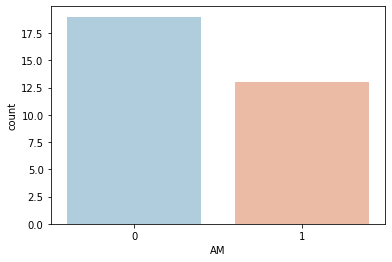

In [10]:
sb.countplot(x='AM',data=cars,palette='RdBu_r')

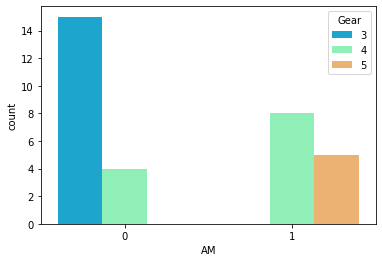

In [11]:
sb.countplot(x='AM',hue='Gear',data=cars,palette='rainbow')

# Training & Testing Split

In [12]:
#car has  Automatic(1) or Manual(0) Gear System  - AM 

# Using predictor variables/ features/ independent variabes, x1, x2, x3,... => X
y = cars.AM
X = cars.loc[:,['MPG','HP','Wt']]  # Here .loc is use access groups of columns, like here we have taken HP,Wt,AM columns.
# To predict Miles per Gallon(MPG) of the cars with some independent variables from the dataset, we have taken
# independent variable 'HP','Wt','AM' as x-axis and predictable MPG as y-axis.x-axis and predictable MPG as y-axis.

In [13]:
# training and testing model selection
from sklearn.model_selection import train_test_split
# In this command we are importing training and test split from sklearn model
# sklearn.model_selection. train_test_split (*arrays, **options)[source] Split arrays or matrices into random train and 
# test subsets.

In [14]:
# Creating training and test set.
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2,random_state=10)
# 0.20 i.e, taking 20 % of data for testing.
# The random_state parameter is used for initializing the internal random number generator, which will decide the splitting
# of data into train and test indices.

In [15]:
print("X_train shape", X_train.shape)
print("X_test shape", X_test.shape)
print("y_train shape", y_train.shape)
print("y_test shape", y_test.shape)

X_train shape (25, 3)
X_test shape (7, 3)
y_train shape (25,)
y_test shape (7,)


In [16]:
# Importing machine learning algorithm
from sklearn.linear_model import LogisticRegression

In [17]:
# Saving logistic regression as model
model = LogisticRegression()

In [18]:
# Training our model
model.fit(X_train,y_train)  # .fit means we are fitting X and y into our data set.

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [19]:
# Predicting our model
y_predict = model.predict(X_test)

In [20]:
y_predict  # This command will give us the predicted Value

array([1, 1, 0, 1, 0, 0, 0], dtype=int64)

In [21]:
y_test # This command will give us the actual Value

20    0
7     0
5     0
2     1
3     0
21    0
13    0
Name: AM, dtype: int64

# Model Evaluation

In [22]:
# Model evaluation 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [23]:
accuracy_score(y_test,y_predict)
# accuracy_score gives the goodness-of-fit measure for Logical regression models

0.7142857142857143

In [24]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       1.00      0.67      0.80         6
           1       0.33      1.00      0.50         1

    accuracy                           0.71         7
   macro avg       0.67      0.83      0.65         7
weighted avg       0.90      0.71      0.76         7



In [25]:
confusion_matrix(y_test,y_predict) # Confusion Matrix is used to check the accuracy 

array([[4, 2],
       [0, 1]], dtype=int64)

In [26]:
5/7 
#(7=5+5+1 & 5=4+1)

0.8571428571428571

0.85 means we have got 85 % accuracy in a classification. 